In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback')
import functions.eddy_feedback as ef 

In [2]:
# era5
ds_era5 = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/era5_data/era5daily_djf_epfluxes.nc', 
                       parallel=True, chunks={'time': 31})

rename_vars = {'latitude': 'lat', 'longitude':'lon'}
ds_era5 = ds_era5.rename(rename_vars)
ds_era5.level

<xarray.DataArray 'level' (level: 37)>
array([   1.,    2.,    3.,    5.,    7.,   10.,   20.,   30.,   50.,   70.,
        100.,  125.,  150.,  175.,  200.,  225.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  775.,  800.,  825.,
        850.,  875.,  900.,  925.,  950.,  975., 1000.])
Coordinates:
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Attributes:
    standard_name:  air_pressure
    long_name:      pressure_level
    units:          millibars
    positive:       down
    axis:           Z

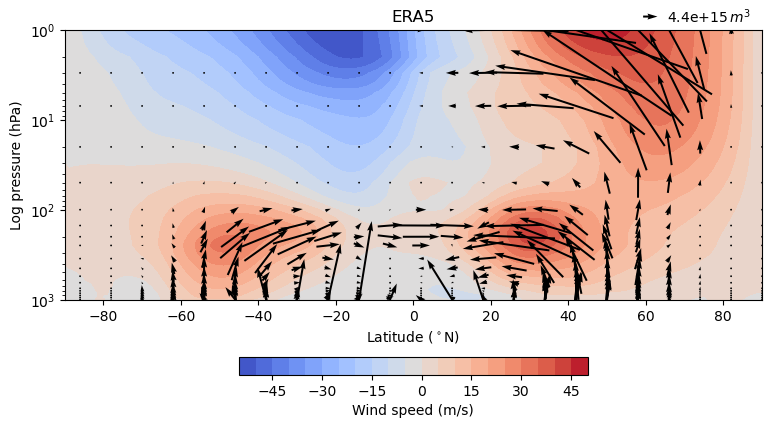

In [3]:
ef.nakamura_plot_DJF(ds_era5, label='ERA5')

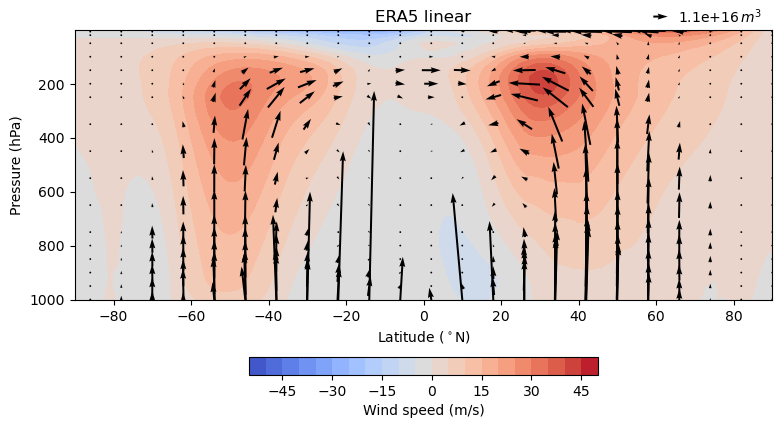

In [4]:
ef.nakamura_plot_DJF(ds_era5, label='ERA5 linear', yscale='linear')

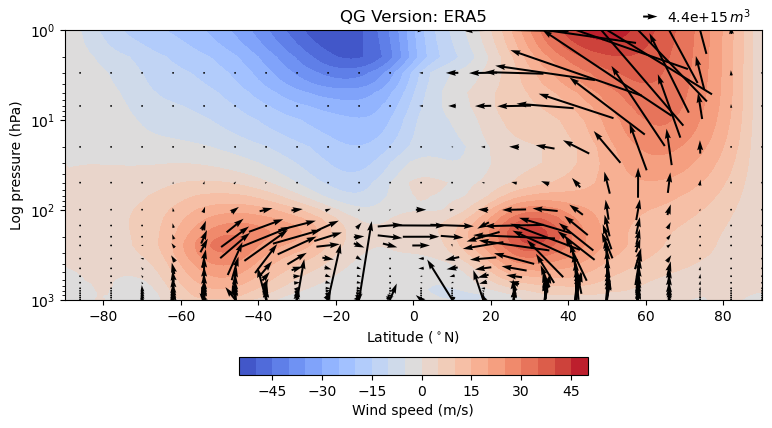

In [5]:
ef.nakamura_plot_DJF(ds_era5, label='QG Version: ERA5', do_ubar=False
                     )

In [6]:
# jra55
ds_jra55 = xr.open_dataset('/home/users/cturrell/documents/eddy_feedback/daily_datasets/jra55_djf_ep.nc')
ds_jra55.level

<xarray.DataArray 'level' (level: 37)>
array([   1.,    2.,    3.,    5.,    7.,   10.,   20.,   30.,   50.,   70.,
        100.,  125.,  150.,  175.,  200.,  225.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  775.,  800.,  825.,
        850.,  875.,  900.,  925.,  950.,  975., 1000.])
Coordinates:
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03

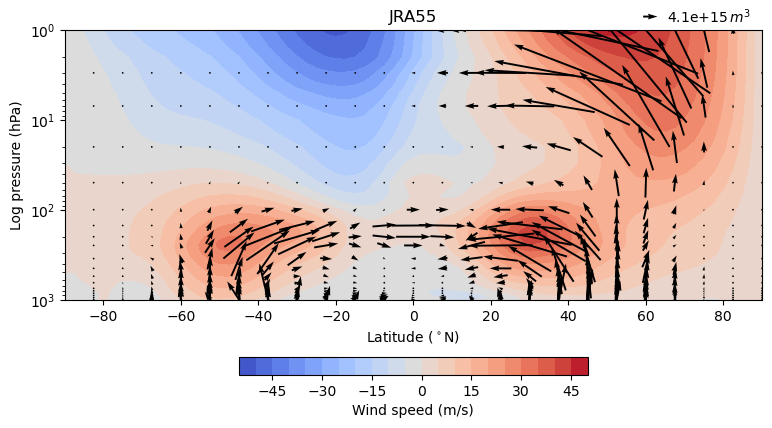

In [7]:
ef.nakamura_plot_DJF(ds_jra55, label='JRA55', skip_lat=3)

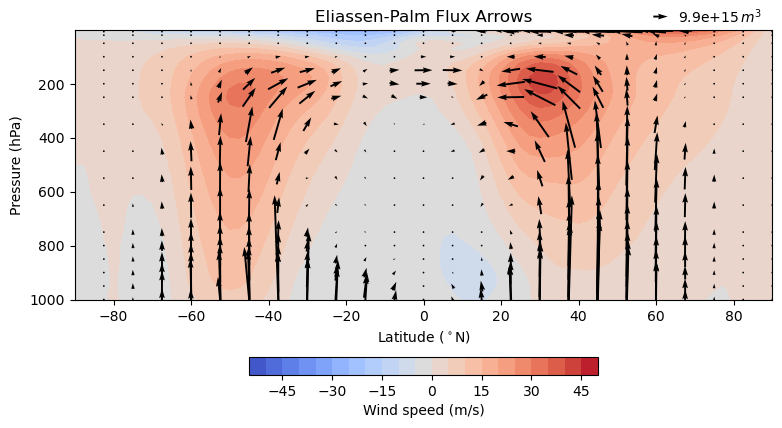

In [8]:
ef.nakamura_plot_DJF(ds_jra55, label='Eliassen-Palm Flux Arrows', skip_lat=3, yscale='linear')

In [9]:
ds_jra55

<xarray.Dataset>
Dimensions:  (time: 5325, lon: 144, lat: 73, level: 37)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    v        (time, level, lat, lon) float32 ...
    t        (time, level, lat, lon) float32 ...
    omega    (time, level, lat, lon) float32 ...
    u        (time, level, lat, lon) float32 ...
    ep1      (time, level, lat) float64 0.005775 -9.301 ... 2.267 0.0006846
    ep2      (time, level, lat) float64 -4.714e-12 -0.0002263 ... -0.01356 -0.0
    div1     (time, level, lat) float64 ...
    div2     (time, level, lat) float64 ...
    ubar     (level, lat) float32 4.754e-06 6.469 11.92 ... -1.993 7.151e-06

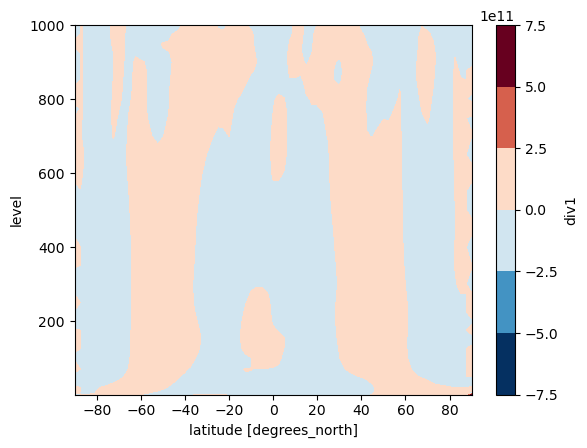

In [10]:
div1 = ds_jra55.div1.mean(('time'))

div1.plot.contourf()

In [11]:
print(div1.max())
print(div1.min())

<xarray.DataArray 'div1' ()>
array(6.47723468e+11)
<xarray.DataArray 'div1' ()>
array(-5.10203268e+11)


In [12]:
div1a = div1.values.flatten()
print(len(div1a))

e10 = [] # greater than e10
e5 = [] # e5 < x < e10
e0 = [] # e0 < x < e5

for item in div1a:
    
    if abs(item) > 1e10:
        e10.append(item)
    elif abs(item) > 1e5:
        e5.append(item)
    else:
        e0.append(item)
        
print(len(e10) + len(e5) + len(e0))

freq = [len(e0), len(e5), len(e10)]
print(freq)

2701
2701
[2627, 32, 42]


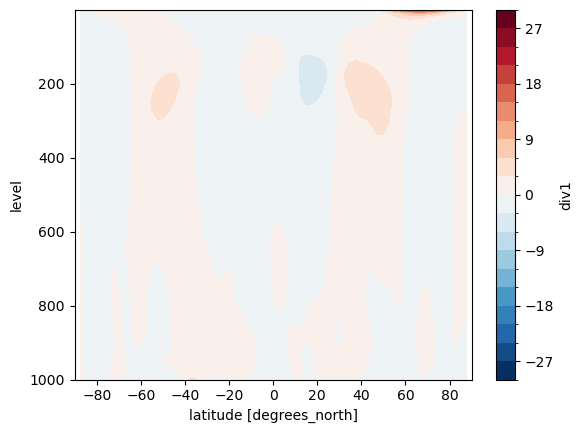

In [13]:
d1 = div1.where(abs(div1) < 1e5)
d1.plot.contourf(yincrease=False, levels=20)

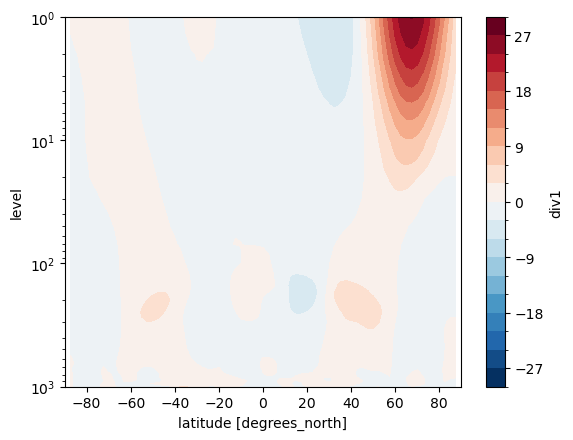

In [14]:
d1.plot.contourf(yincrease=False, yscale='log', levels=20)

In [15]:
d1a = d1[10:,:]
d1a

<xarray.DataArray 'div1' (level: 27, lat: 73)>
array([[        nan, -0.2686508 , -0.4704283 , ..., -0.17977491,
        -0.09747517,         nan],
       [        nan, -0.23282064, -0.43806752, ..., -0.23547494,
        -0.14404752,         nan],
       [        nan, -0.20326978, -0.3858903 , ..., -0.29186804,
        -0.19458619,         nan],
       ...,
       [        nan, -0.5550871 , -0.63245186, ..., -1.90957644,
         1.2520178 ,         nan],
       [        nan, -1.61126551, -1.39530608, ..., -2.06558403,
         1.20781163,         nan],
       [        nan, -2.75358902, -2.29975983, ..., -2.1545308 ,
         1.18631875,         nan]])
Coordinates:
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 100.0 125.0 150.0 175.0 ... 925.0 950.0 975.0 1e+03

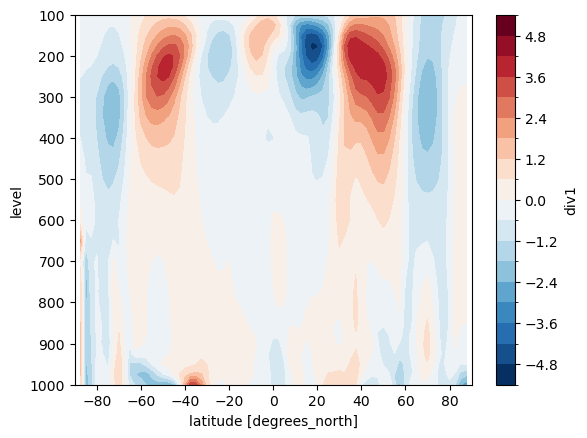

In [16]:
d1a.plot.contourf(yincrease=False, levels=20)

In [17]:
import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback')
import functions.aos_functions as aos

ds = ds_jra55

In [18]:
def plot_epfluxes(ds, no_strat=True, levels=21, skip_lat=3, skip_pres=1, yscale='linear'):
    
    ds = ds.isel( dict( lat=slice(4, 69) ) )
    
    # exclude stratosphere-ish
    if no_strat == True:
        ds = ds.isel(dict( level=slice(10,37) ))
    
    # Set divergence of div1
    div1 = ds.div1.mean(('time'))
    div1 = div1.where(abs(div1) < 1e5)
    
    # skip variables
    skip = dict( lat=slice(None, None, skip_lat), level=slice(None, None, skip_pres) )

    #    set variables
    lat = ds.lat.isel(dict(lat=slice(None, None, skip_lat)))
    p = ds.level.isel(dict(level=slice(None, None, skip_pres)))
    Fphi = ds.ep1.mean(('time')).isel(skip)
    Fp = ds.ep2.mean(('time')).isel(skip)
    
    fig, ax = plt.subplots(figsize=(9,5))

    import seaborn as sns
    coolwarm = sns.color_palette("coolwarm", as_cmap=True)

    plt.contourf(ds.lat.values, ds.level.values, div1,
              cmap=coolwarm, levels=levels)
    plt.colorbar(location='bottom', orientation='horizontal', shrink=0.5,
             label='Wind speed (m/s)')

    aos.PlotEPfluxArrows(lat, p, Fphi, Fp,
                     fig, ax, pivot='mid', yscale=yscale)
    plt.title('EP flux and northward divergence of EP Flux')
    plt.xlabel('Latitude ($^\\circ$N)')
    
    if yscale=='log':
        plt.ylabel('Log pressure (hPa)')
    else:
        plt.ylabel('Pressure (hPa)')
        
    plt.show()

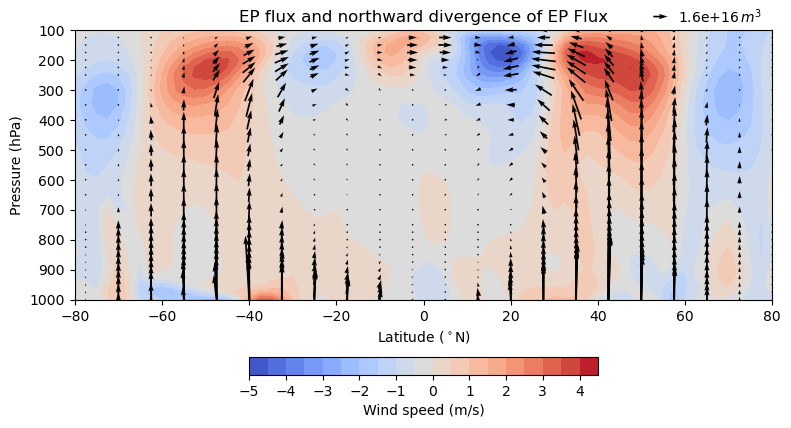

In [19]:
plot_epfluxes(ds)

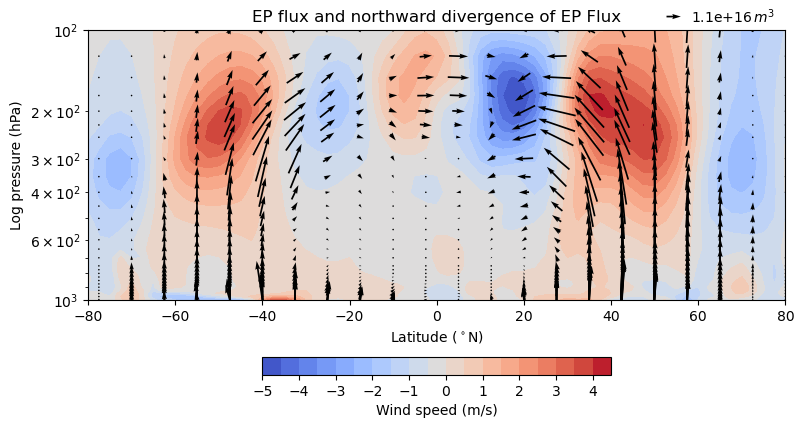

In [20]:
plot_epfluxes(ds, yscale='log')

In [21]:
ds.level[10:]

<xarray.DataArray 'level' (level: 27)>
array([ 100.,  125.,  150.,  175.,  200.,  225.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  775.,  800.,  825.,
        850.,  875.,  900.,  925.,  950.,  975., 1000.])
Coordinates:
  * level    (level) float64 100.0 125.0 150.0 175.0 ... 925.0 950.0 975.0 1e+03

In [22]:
ds.isel(dict( level=slice(10,37) )).level

<xarray.DataArray 'level' (level: 27)>
array([ 100.,  125.,  150.,  175.,  200.,  225.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  775.,  800.,  825.,
        850.,  875.,  900.,  925.,  950.,  975., 1000.])
Coordinates:
  * level    (level) float64 100.0 125.0 150.0 175.0 ... 925.0 950.0 975.0 1e+03

ds = ds.sel(ds.level > 100)
ds

In [23]:
ef.correlation_contourf(ds, logscale=False, show_rect=False)

MemoryError: Unable to allocate 7.72 GiB for an array with shape (5325, 37, 73, 144) and data type float32

In [ ]:
ds.u.mean(('lon', 'time'))

MemoryError: Unable to allocate 7.72 GiB for an array with shape (5325, 37, 73, 144) and data type float32

In [ ]:
ef.correlation_contourf(ds)

: 